### 1. Data Visualization

In [16]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# loading out dataset from previous notebook

urldata = pd.read_csv("../preprocessing/DGA_Processed.csv")
urldata.drop(["Unnamed: 0"],axis=1,inplace=True)

urldata.head(10)

,domain_name,label,DNL,NoS,SLM,HwP,HVTLD,CSCS,CTS,UR,...,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy,domain,alexa_grams,words_grams
0,vvqbhhwma.org,1,13,1,9.0,0,1,0,0,0.0,...,0,0.111111,0.0,0.285714,0.888889,0.0,2.725481,vvqbhhwma,3.480582,4.430817
1,cfhauqbaz.com,1,13,1,9.0,0,1,0,0,0.0,...,0,0.333333,0.0,0.125000,0.555556,0.0,2.947703,cfhauqbaz,11.153124,14.986492
2,bvxjsbkqu.biz,1,13,1,9.0,0,1,0,0,0.0,...,0,0.111111,0.0,0.125000,0.888889,0.0,2.947703,bvxjsbkqu,4.006466,0.000000
3,hggazskvkdy.com,1,15,1,11.0,0,1,0,0,0.0,...,0,0.090909,0.0,0.222222,0.272727,0.0,3.095795,hggazskvkdy,11.862345,10.112126
4,xgoqyxgfgm.com,1,14,1,10.0,0,1,0,0,0.0,...,0,0.100000,0.0,0.285714,0.200000,0.0,2.646439,xgoqyxgfgm,3.497759,0.000000
5,inlduxhja.org,1,13,1,9.0,0,1,0,0,0.0,...,0,0.333333,0.0,0.000000,0.666667,0.0,3.169925,inlduxhja,10.639510,13.110712
6,tolmyya.info,1,12,1,7.0,0,1,0,0,0.0,...,0,0.285714,0.0,0.166667,0.571429,0.0,2.521641,tolmyya,11.869009,18.248778
7,drgahps.biz,1,11,1,7.0,0,1,0,0,0.0,...,0,0.142857,0.0,0.000000,0.428571,0.0,2.807355,drgahps,13.988046,10.302935
8,kqcboo.biz,1,10,1,6.0,0,1,0,0,0.0,...,0,0.333333,0.0,0.200000,0.666667,0.0,2.251629,kqcboo,7.612582,6.400257
9,xatqeov.biz,1,11,1,7.0,0,1,0,0,0.0,...,0,0.428571,0.0,0.000000,0.285714,0.0,2.807355,xatqeov,5.468170,8.253228


In [18]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389574 entries, 0 to 1389573
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   domain_name     1389574 non-null  object 
 1   label           1389574 non-null  int64  
 2   DNL             1389574 non-null  int64  
 3   NoS             1389574 non-null  int64  
 4   SLM             1389574 non-null  float64
 5   HwP             1389574 non-null  int64  
 6   HVTLD           1389574 non-null  int64  
 7   CSCS            1389574 non-null  int64  
 8   CTS             1389574 non-null  int64  
 9   UR              1389574 non-null  float64
 10  CIPA            1389574 non-null  int64  
 11  contains_digit  1389574 non-null  int64  
 12  vowel_ratio     1387981 non-null  float64
 13  digit_ratio     1389472 non-null  float64
 14  RRC             1389574 non-null  float64
 15  RCC             1389574 non-null  float64
 16  RCD             1389574 non-null  fl

In [19]:
for column in urldata.columns[urldata.isna().any()].tolist():
    percent_missing = urldata[column].isnull().sum() / len(urldata)
    print(f"Percentage of missing values in {column}: {percent_missing:.2%}")

Percentage of missing values in vowel_ratio: 0.11%
Percentage of missing values in digit_ratio: 0.01%
Percentage of missing values in domain: 0.00%


In [20]:
urldata['vowel_ratio'].fillna(0, inplace=True)
urldata['digit_ratio'].fillna(0, inplace=True)

In [24]:
# remove uneccessary columns
urldata.drop(["domain_name","domain"],axis=1,inplace=True)
urldata.head()

,label,DNL,NoS,SLM,HwP,HVTLD,CSCS,CTS,UR,CIPA,contains_digit,vowel_ratio,digit_ratio,RRC,RCC,RCD,Entropy,alexa_grams,words_grams
0,1,13,1,9.0,0,1,0,0,0.0,0,0,0.111111,0.0,0.285714,0.888889,0.0,2.725481,3.480582,4.430817
1,1,13,1,9.0,0,1,0,0,0.0,0,0,0.333333,0.0,0.125000,0.555556,0.0,2.947703,11.153124,14.986492
2,1,13,1,9.0,0,1,0,0,0.0,0,0,0.111111,0.0,0.125000,0.888889,0.0,2.947703,4.006466,0.000000
3,1,15,1,11.0,0,1,0,0,0.0,0,0,0.090909,0.0,0.222222,0.272727,0.0,3.095795,11.862345,10.112126
4,1,14,1,10.0,0,1,0,0,0.0,0,0,0.100000,0.0,0.285714,0.200000,0.0,2.646439,3.497759,0.000000


<Axes: >

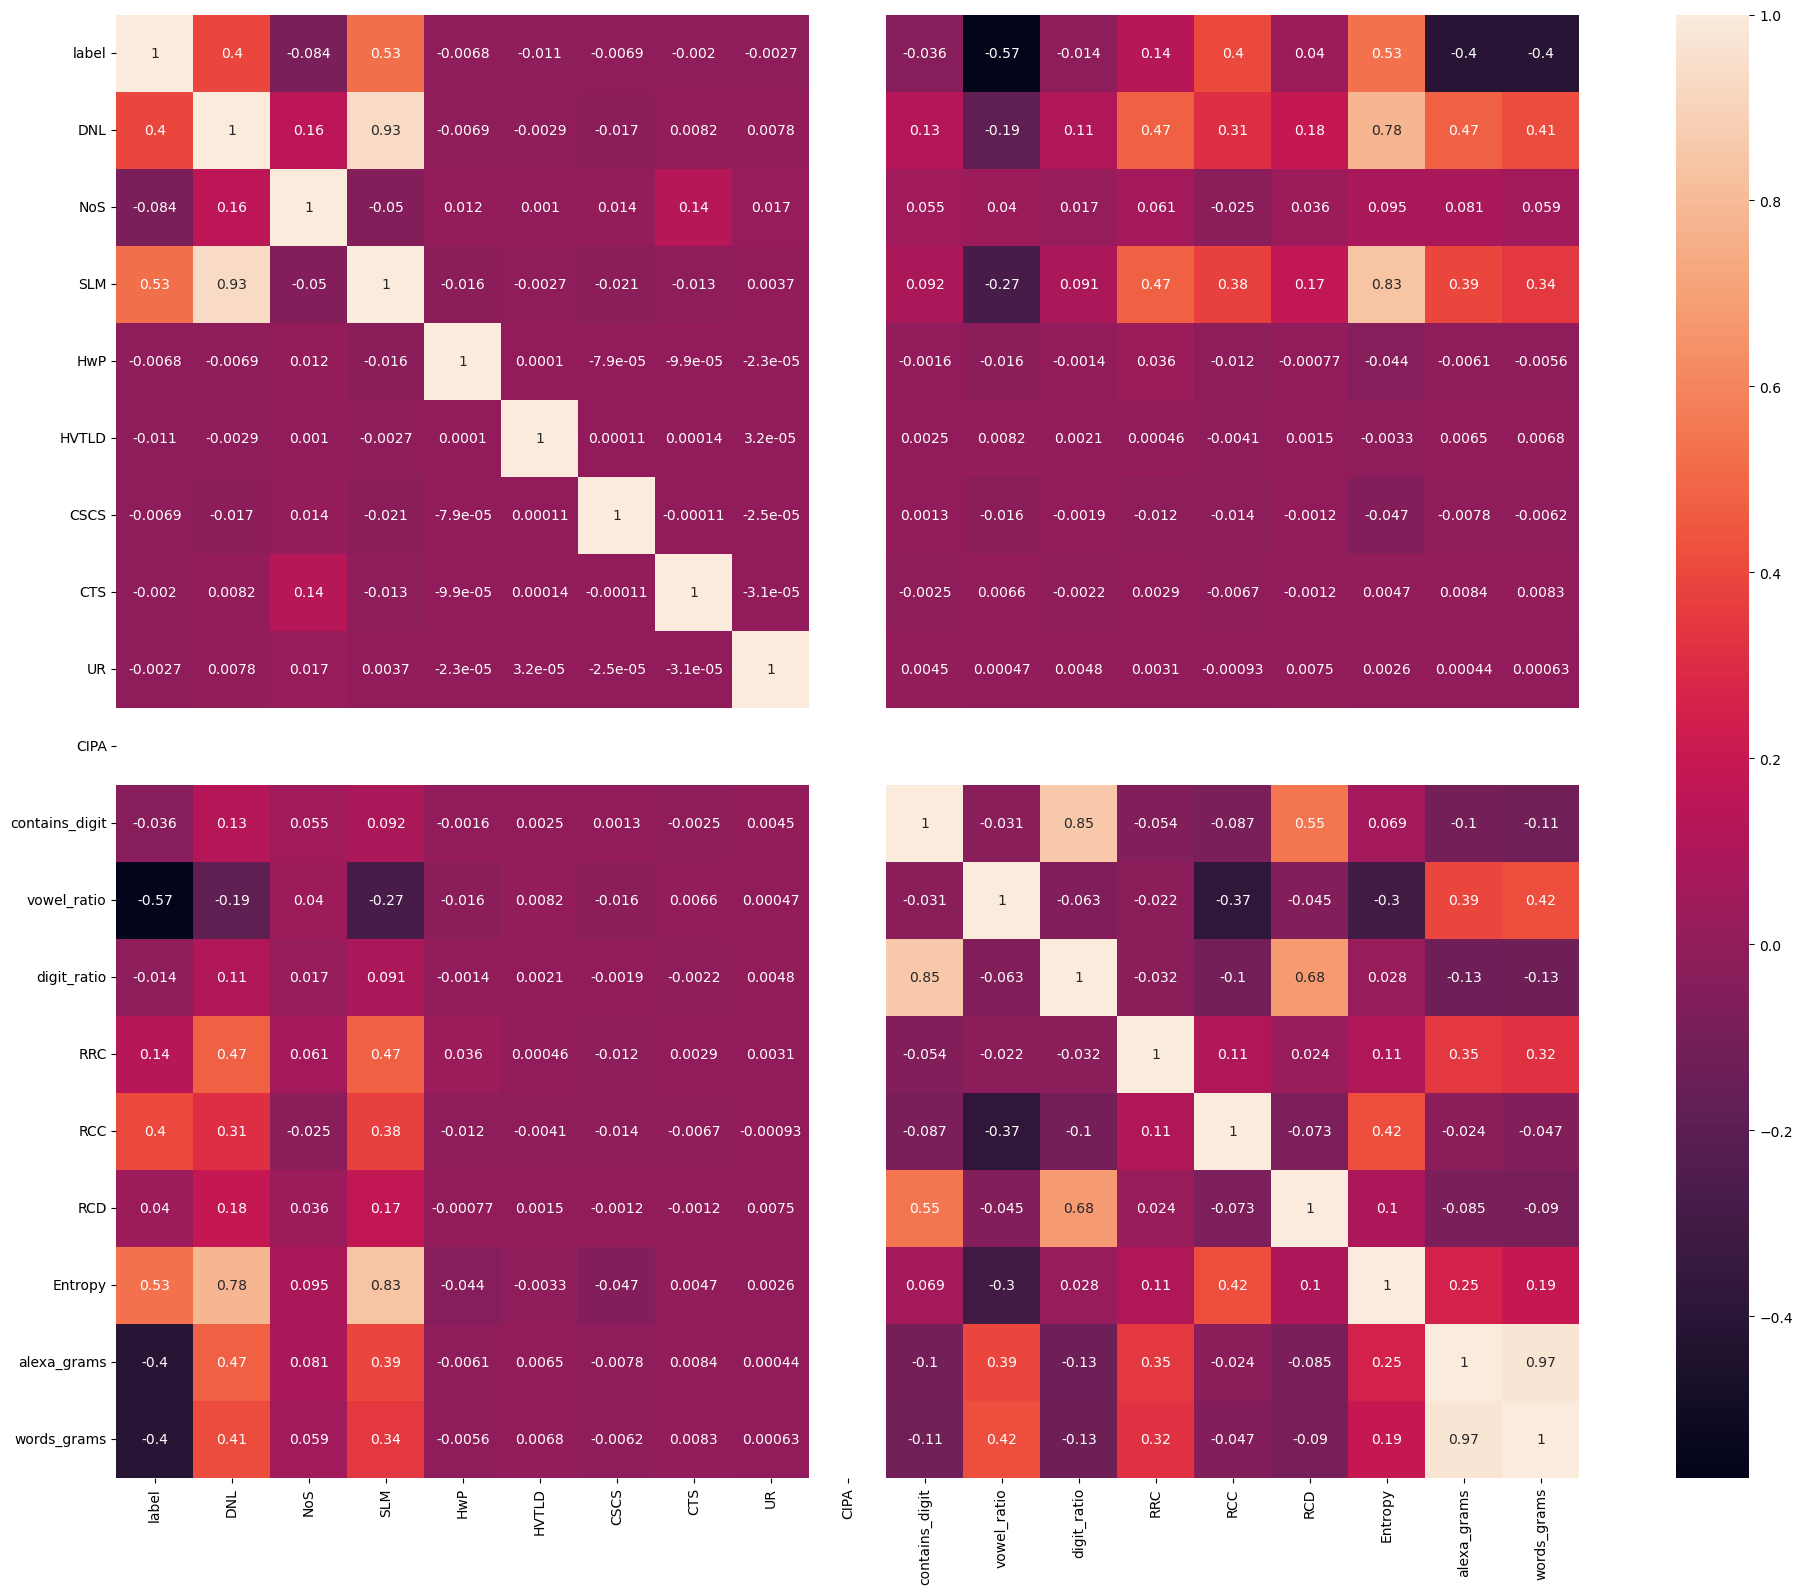

In [25]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

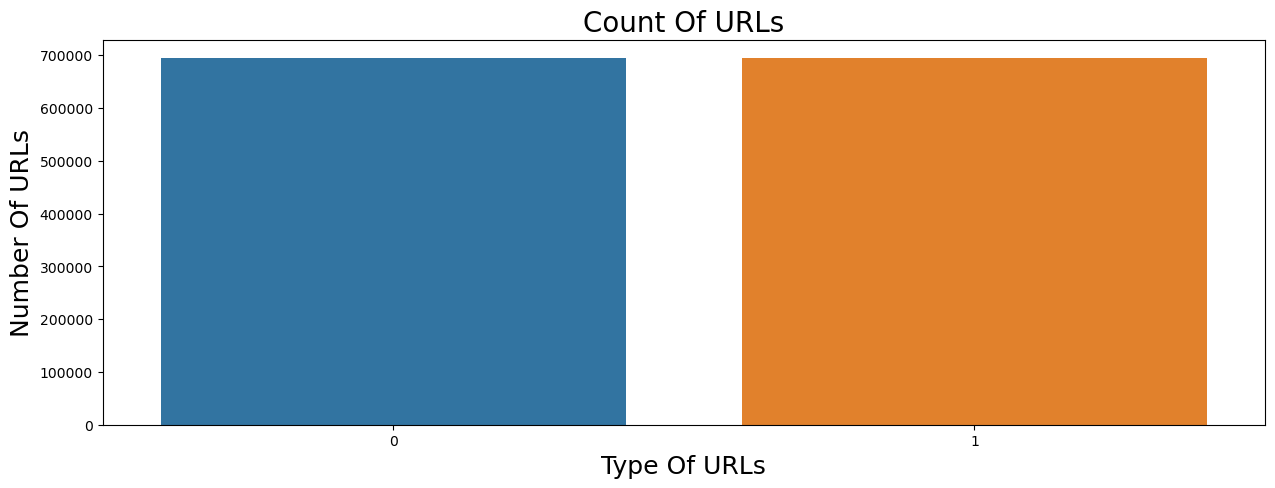

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

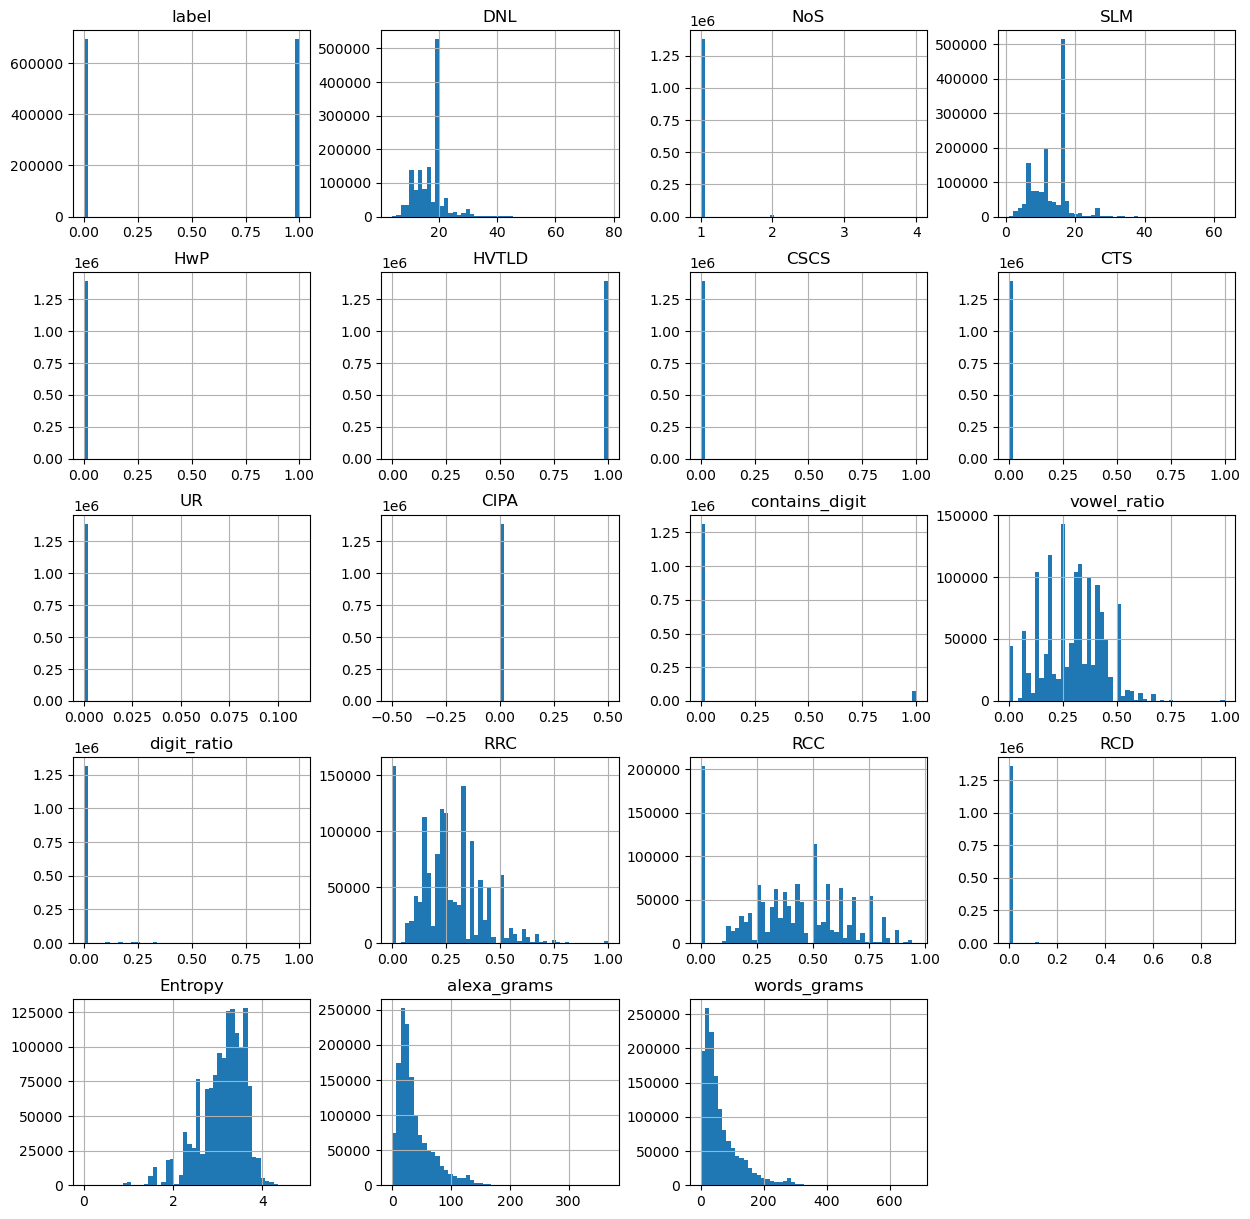

In [27]:
#Plotting the data distribution
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

In [28]:
list(urldata.columns)

['label',
 'DNL',
 'NoS',
 'SLM',
 'HwP',
 'HVTLD',
 'CSCS',
 'CTS',
 'UR',
 'CIPA',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy',
 'alexa_grams',
 'words_grams']

### 2. Model Training
We will using four models for our classification

<ol>
    <li>LightGBM</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
    <li>Gradient-boosted</li>
</ol>

#### Data Splitting
We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [29]:
# Creating feature and target vector

X = urldata[[ 'DNL',
 'NoS',
 'SLM',
 'HwP',
 'HVTLD',
 'CSCS',
 'CTS',
 'UR',
 'CIPA',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy',
 'alexa_grams',
 'words_grams']]
y = urldata['label']

In [30]:
# Creating train and test dataset with respect to a prior shuflle and a strtify

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True, stratify=y)

#### 2.1 LightGBM

In [32]:
# Model training and prediction using lightbgm

import lightgbm as lgb


lgb_clf = lgb.LGBMClassifier()

lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 555830, number of negative: 555829
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 1111659, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000002
[LightGBM] [Info] Start training from score 0.000002


In [33]:
# f1 score metric & accuracy

from sklearn.metrics import f1_score,accuracy_score

print("Accuracy score is {}%".format((accuracy_score(y_test, y_pred) * 100)))
# calculating other classification metrics
print(classification_report(y_pred,y_test,target_names=["legitimate","malicious"]))

Accuracy score is 98.54991634132737%
              precision    recall  f1-score   support

  legitimate       0.99      0.98      0.99    140290
   malicious       0.98      0.99      0.99    137625

    accuracy                           0.99    277915
   macro avg       0.99      0.99      0.99    277915
weighted avg       0.99      0.99      0.99    277915



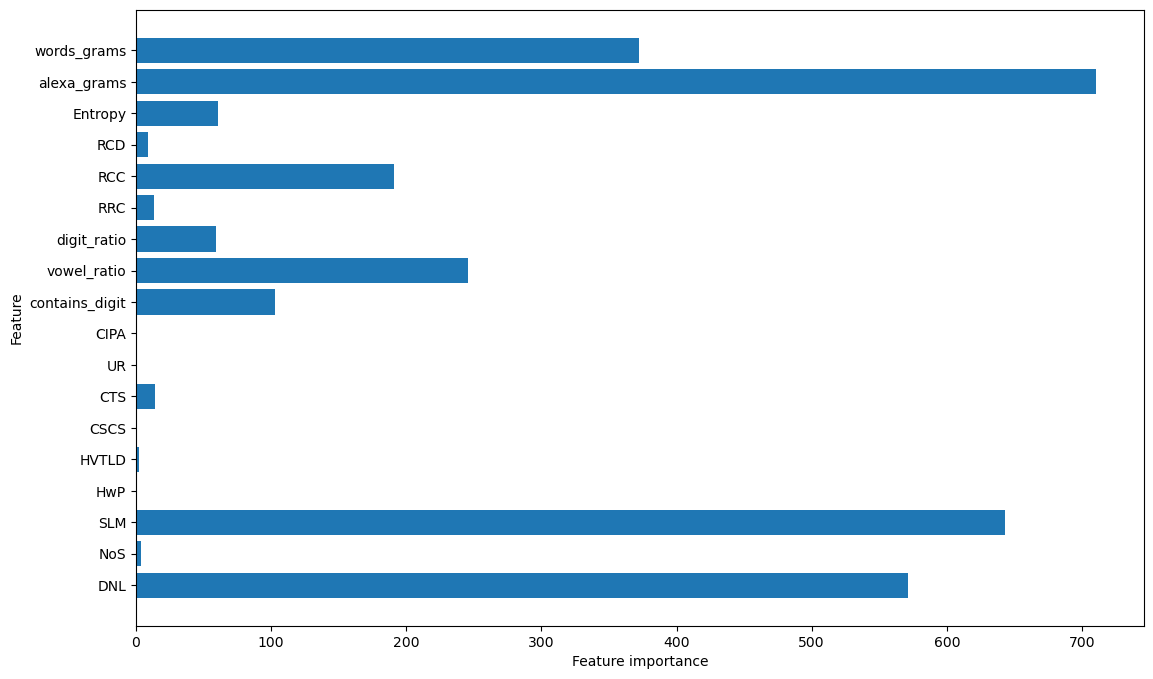

In [35]:
feature_names = ['DNL',
 'NoS',
 'SLM',
 'HwP',
 'HVTLD',
 'CSCS',
 'CTS',
 'UR',
 'CIPA',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy',
 'alexa_grams',
 'words_grams']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), lgb_clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### 2.2 Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)
accuracy_score(y_test, rfc_predictions)

0.9871615421981541

In [45]:
# f1 score metric & accuracy

from sklearn.metrics import f1_score,accuracy_score

print("Accuracy score is {}%".format((accuracy_score(y_test, rfc_predictions) * 100)))
# calculating other classification metrics
print(classification_report(rfc_predictions,y_test,target_names=["legitimate","malicious"]))

Accuracy score is 98.71615421981541%
              precision    recall  f1-score   support

  legitimate       0.99      0.98      0.99    139962
   malicious       0.98      0.99      0.99    137953

    accuracy                           0.99    277915
   macro avg       0.99      0.99      0.99    277915
weighted avg       0.99      0.99      0.99    277915



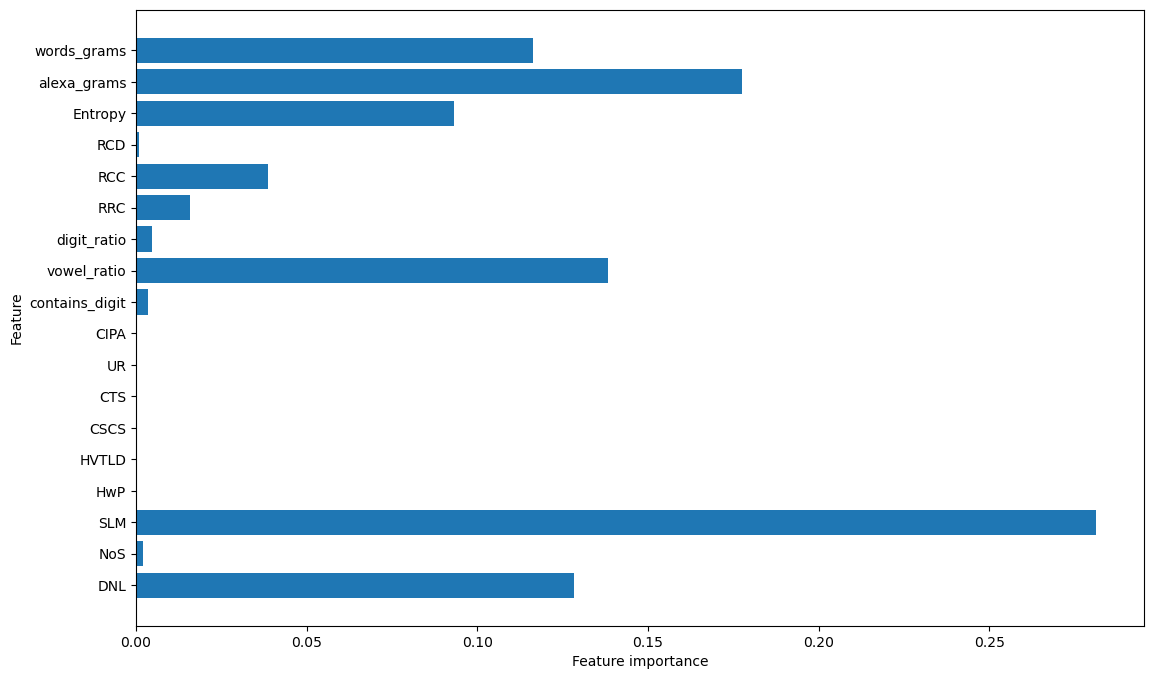

In [46]:
feature_names = ['DNL',
 'NoS',
 'SLM',
 'HwP',
 'HVTLD',
 'CSCS',
 'CTS',
 'UR',
 'CIPA',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy',
 'alexa_grams',
 'words_grams']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### 2.3 XGBoost

In [47]:
from xgboost.sklearn import XGBClassifier
#XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train,y_train)

xg_predictions = xgb_model.predict(X_test)
accuracy_score(y_test,xg_predictions)

0.986895273734775

In [48]:
# f1 score metric & accuracy


print("Accuracy score is {}%".format((accuracy_score(y_test, xg_predictions) * 100)))
# calculating other classification metrics
print(classification_report(xg_predictions,y_test,target_names=["legitimate","malicious"]))

Accuracy score is 98.6895273734775%
              precision    recall  f1-score   support

  legitimate       0.99      0.98      0.99    140164
   malicious       0.98      0.99      0.99    137751

    accuracy                           0.99    277915
   macro avg       0.99      0.99      0.99    277915
weighted avg       0.99      0.99      0.99    277915



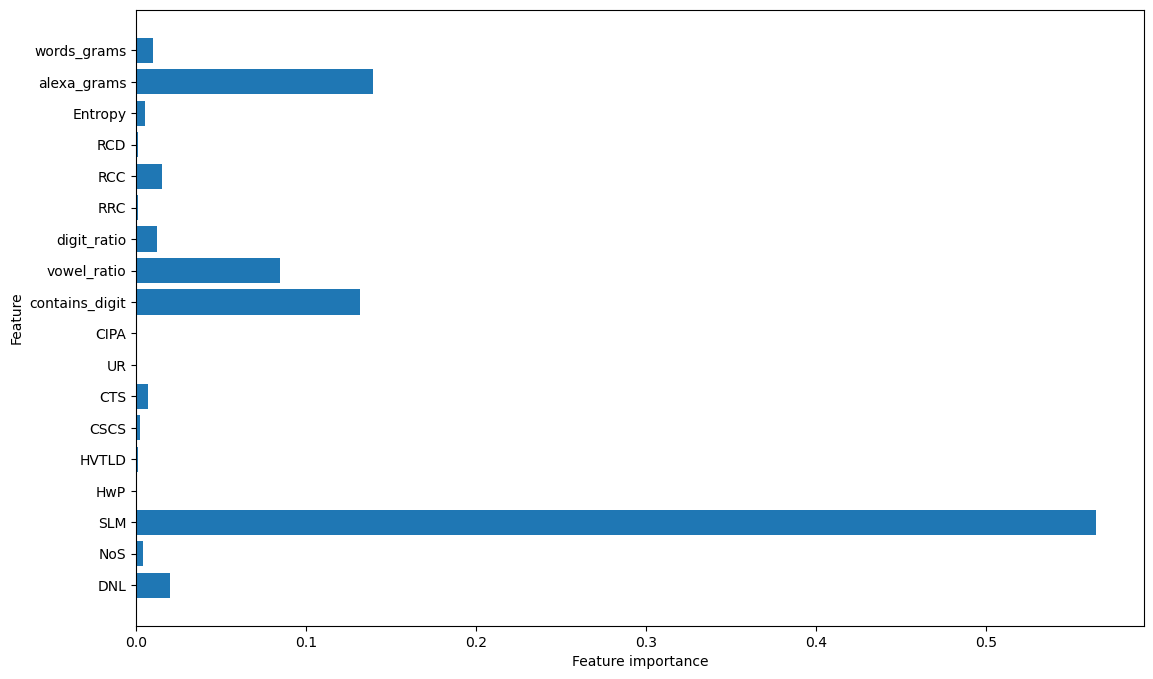

In [49]:
feature_names = ['DNL',
 'NoS',
 'SLM',
 'HwP',
 'HVTLD',
 'CSCS',
 'CTS',
 'UR',
 'CIPA',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy',
 'alexa_grams',
 'words_grams']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### 2.4 Gradient-boosted 

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient-boosted tree classifier

# Train a GBT model.
gbt = GradientBoostingClassifier(random_state=42)

gbt.fit(X_train,y_train)

gbt_predictions = gbt.predict(X_test)
accuracy_score(y_test,gbt_predictions)

0.9764208481010381

In [55]:
# f1 score metric & accuracy


print("Accuracy score is {}%".format((accuracy_score(y_test, gbt_predictions) * 100)))
# calculating other classification metrics
print(classification_report(gbt_predictions,y_test,target_names=["legitimate","malicious"]))

Accuracy score is 97.64208481010381%
              precision    recall  f1-score   support

  legitimate       0.99      0.97      0.98    141627
   malicious       0.97      0.99      0.98    136288

    accuracy                           0.98    277915
   macro avg       0.98      0.98      0.98    277915
weighted avg       0.98      0.98      0.98    277915



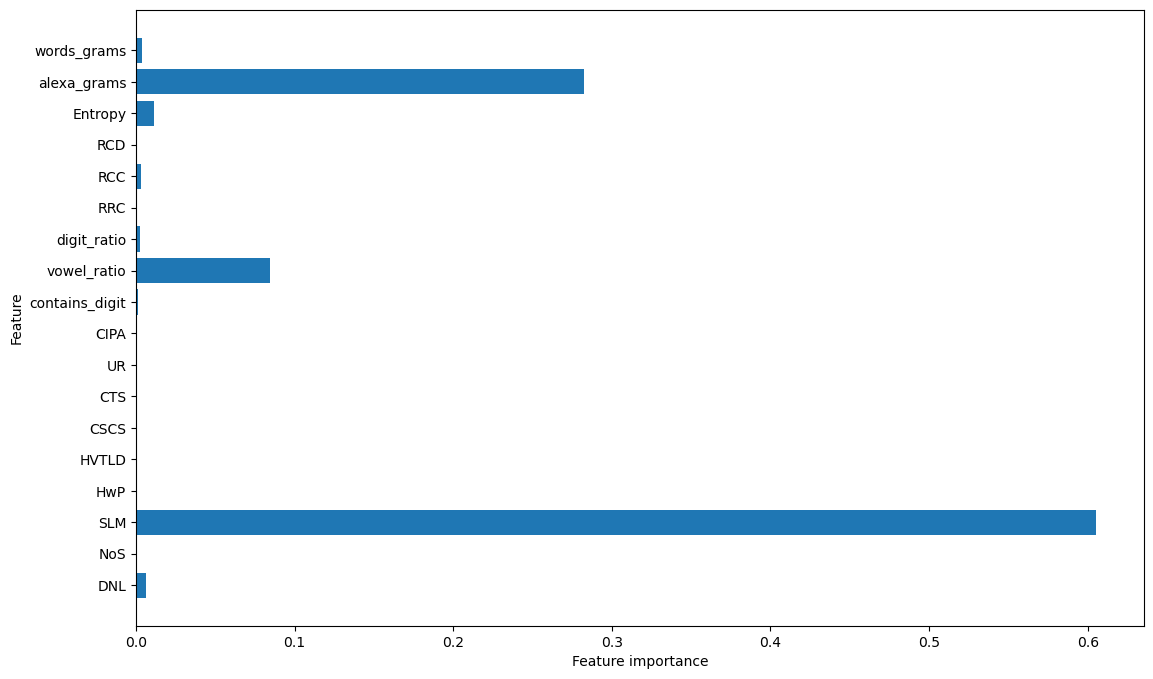

In [56]:
feature_names = ['DNL',
 'NoS',
 'SLM',
 'HwP',
 'HVTLD',
 'CSCS',
 'CTS',
 'UR',
 'CIPA',
 'contains_digit',
 'vowel_ratio',
 'digit_ratio',
 'RRC',
 'RCC',
 'RCD',
 'Entropy',
 'alexa_grams',
 'words_grams']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbt.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [50]:
import joblib
model = open("../models/DGA_RandomForest.pkl","wb")
joblib.dump(rfc, model)
model.close()

In [57]:
import joblib
model = open("../models/DGA_Lightgbm.pkl","wb")
joblib.dump(lgb_clf, model)
model.close()